# 📗📒📕 Book Recommendation System :-

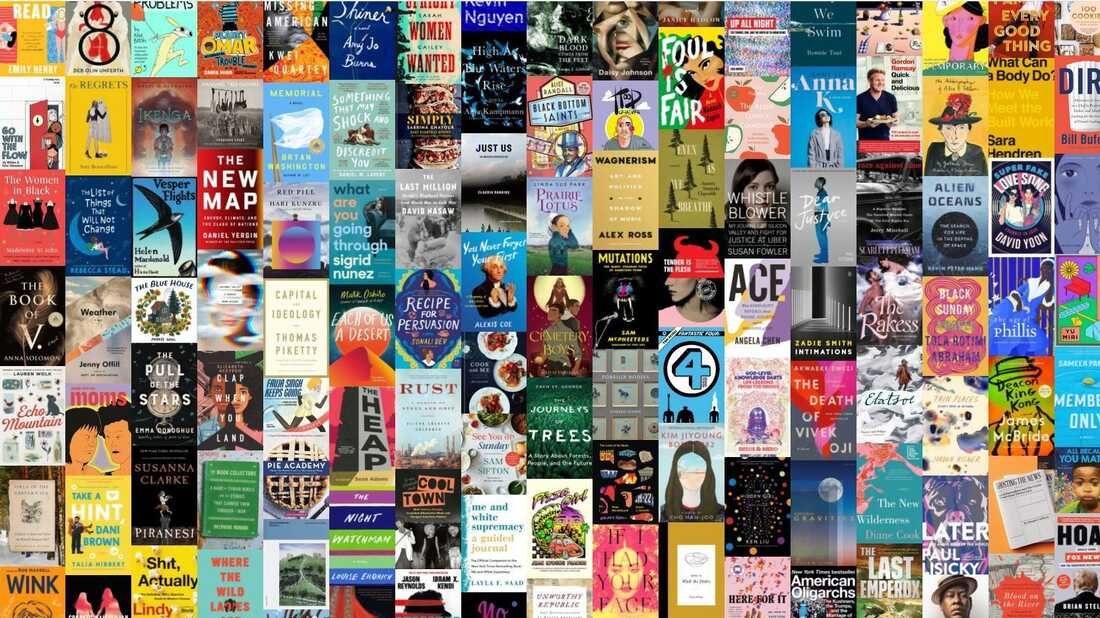

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Book.jpg")

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d thedevastator/comprehensive-overview-of-52478-goodreads-best-b

comprehensive-overview-of-52478-goodreads-best-b.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
file=zipfile.ZipFile('/content/comprehensive-overview-of-52478-goodreads-best-b.zip','r')
file.extractall('/content')
file.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings('ignore')
import sklearn
from bs4 import BeautifulSoup
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df1=pd.read_csv('/content/books_1.Best_Books_Ever.csv')
df1

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

In [6]:
df=df1[['title','language','rating','description']]
df

,title,language,rating,description
0,The Hunger Games,English,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,Harry Potter and the Order of the Phoenix,English,4.50,There is a door at the end of a silent corrido...
2,To Kill a Mockingbird,English,4.28,The unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,English,4.26,Alternate cover edition of ISBN 9780679783268S...
4,Twilight,English,3.60,About three things I was absolutely positive.\...
...,...,...,...,...
52473,Fractured,English,4.00,The Fateful Trilogy continues with Fractured. ...
52474,Anasazi,English,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by..."
52475,Marked,English,3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...
52476,Wayward Son,English,3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...


In [7]:
df.shape

(52478, 4)

In [8]:
df.duplicated().sum()

55

In [9]:
df.drop_duplicates(inplace=True,)

In [10]:
df.duplicated().sum()

0

In [11]:
df['title'].duplicated().sum()

2496

In [12]:
app=[]
lis=list(df['title'])
for i in lis:
  if lis.count(i)>1:
    app.append(i)
print(app)

['Twilight', 'Animal Farm', 'Jane Eyre', 'The Alchemist', 'City of Bones', 'Little Women', 'Rebecca', 'Vampire Academy', 'The Stranger', 'Hush, Hush', 'It', 'The Little House Collection', 'Atonement', 'The Three Musketeers', 'Frostbite', 'The Prophet', 'Alice in Wonderland', 'Treasure Island', 'A Little Princess', 'Fallen', 'The Selection', 'Spirit Bound', "Cat's Cradle", 'The Wind in the Willows', 'Shiver', 'The Phantom of the Opera', 'Blindness', 'Marked', 'The Secret History', 'Beautiful Disaster', 'The Once and Future King', 'Into the Wild', 'Paradise Lost', 'The Complete Works', 'Foundation', 'Norwegian Wood', 'Walden', 'The Awakening', 'The Way of Kings', 'Legend', 'Beowulf', 'Beautiful Creatures', 'Obsidian', "'Salem's Lot", 'The Firm', 'Inferno', 'Evermore', 'The Prince', 'Hamlet', 'The Chosen', 'The Reader', 'Betrayed', 'Untamed', 'The One', 'Voyager', 'Chosen', 'Coraline', 'The Iron King', 'Torment', 'Bloodlines', 'North and South', 'The Summoning', 'Red Queen', 'City of Glas

In [13]:
df.isnull().sum()

title             0
language       3800
rating            0
description    1336
dtype: int64

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.isnull().sum()

title          0
language       0
rating         0
description    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47620 entries, 0 to 52477
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        47620 non-null  object 
 1   language     47620 non-null  object 
 2   rating       47620 non-null  float64
 3   description  47620 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [17]:
df2=df.loc[df['language']=='English']
df2

,title,language,rating,description
0,The Hunger Games,English,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,Harry Potter and the Order of the Phoenix,English,4.50,There is a door at the end of a silent corrido...
2,To Kill a Mockingbird,English,4.28,The unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,English,4.26,Alternate cover edition of ISBN 9780679783268S...
4,Twilight,English,3.60,About three things I was absolutely positive.\...
...,...,...,...,...
52473,Fractured,English,4.00,The Fateful Trilogy continues with Fractured. ...
52474,Anasazi,English,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by..."
52475,Marked,English,3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...
52476,Wayward Son,English,3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...


In [18]:
df2.describe()

,rating
count,42123.000000
mean,4.018241
std,0.335960
min,0.000000
25%,3.830000
50%,4.030000
75%,4.210000
max,5.000000


<Axes: xlabel='rating', ylabel='Density'>

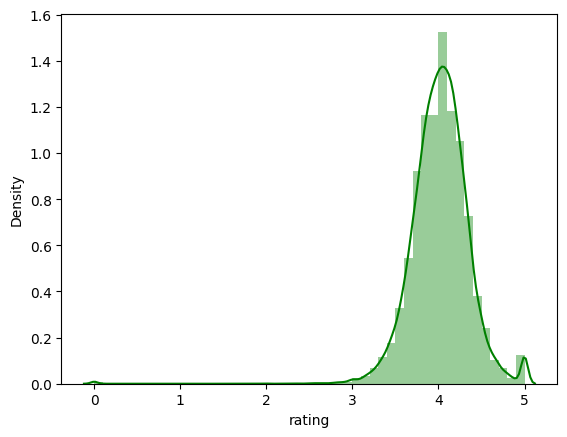

In [19]:
sns.distplot(df2['rating'],color='green')

In [20]:
clean_df=df2.loc[df2['rating']>=4]
dff=pd.DataFrame(clean_df.values)
dff.columns=clean_df.columns
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,Harry Potter and the Order of the Phoenix,English,4.5,There is a door at the end of a silent corrido...
2,To Kill a Mockingbird,English,4.28,The unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,English,4.26,Alternate cover edition of ISBN 9780679783268S...
4,The Book Thief,English,4.37,Librarian's note: An alternate cover edition c...
...,...,...,...,...
22843,Elemental,English,4.07,When seventeen-year-old Kara Nightingale is su...
22844,Unbelievable,English,4.16,Lilah Lopez Dreser's in town to take care of u...
22845,Fractured,English,4.0,The Fateful Trilogy continues with Fractured. ...
22846,Anasazi,English,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by..."


# Applying NLP (Removing HTML Tags) :

In [21]:
def remove_html(text):
  bs=BeautifulSoup(text,'html.parser')
  return bs.get_text()
dff['description']=dff['description'].apply(lambda text:remove_html(text))
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,Harry Potter and the Order of the Phoenix,English,4.5,There is a door at the end of a silent corrido...
2,To Kill a Mockingbird,English,4.28,The unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,English,4.26,Alternate cover edition of ISBN 9780679783268S...
4,The Book Thief,English,4.37,Librarian's note: An alternate cover edition c...
...,...,...,...,...
22843,Elemental,English,4.07,When seventeen-year-old Kara Nightingale is su...
22844,Unbelievable,English,4.16,Lilah Lopez Dreser's in town to take care of u...
22845,Fractured,English,4.0,The Fateful Trilogy continues with Fractured. ...
22846,Anasazi,English,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by..."


## Converting Into Lower Case :

In [22]:
dff['description']=dff['description'].str.lower()
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,winning means fame and fortune.losing means ce...
1,Harry Potter and the Order of the Phoenix,English,4.5,there is a door at the end of a silent corrido...
2,To Kill a Mockingbird,English,4.28,the unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,English,4.26,alternate cover edition of isbn 9780679783268s...
4,The Book Thief,English,4.37,librarian's note: an alternate cover edition c...
...,...,...,...,...
22843,Elemental,English,4.07,when seventeen-year-old kara nightingale is su...
22844,Unbelievable,English,4.16,lilah lopez dreser's in town to take care of u...
22845,Fractured,English,4.0,the fateful trilogy continues with fractured. ...
22846,Anasazi,English,4.19,"'anasazi', sequel to 'the thirteenth chime' by..."


## Removing Punctuations Marks :

In [23]:
from string import punctuation
punc=punctuation
my_punc=punc.replace("'",'')
def remove_punc(text):
  return text.translate(str.maketrans('','',my_punc))
dff['description']=dff['description'].apply(lambda text:remove_punc(text))
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,winning means fame and fortunelosing means cer...
1,Harry Potter and the Order of the Phoenix,English,4.5,there is a door at the end of a silent corrido...
2,To Kill a Mockingbird,English,4.28,the unforgettable novel of a childhood in a sl...
3,Pride and Prejudice,English,4.26,alternate cover edition of isbn 9780679783268s...
4,The Book Thief,English,4.37,librarian's note an alternate cover edition ca...
...,...,...,...,...
22843,Elemental,English,4.07,when seventeenyearold kara nightingale is sudd...
22844,Unbelievable,English,4.16,lilah lopez dreser's in town to take care of u...
22845,Fractured,English,4.0,the fateful trilogy continues with fractured n...
22846,Anasazi,English,4.19,'anasazi' sequel to 'the thirteenth chime' by ...


## Stop Words Treatment :

In [24]:
stop=stopwords.words('english')
def remove_stop(text):
  return ' '.join([word for word in text.split() if word not in stop])
dff['description']=dff['description'].apply(lambda text:remove_stop(text))
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,winning means fame fortunelosing means certain...
1,Harry Potter and the Order of the Phoenix,English,4.5,door end silent corridor it’s haunting harry p...
2,To Kill a Mockingbird,English,4.28,unforgettable novel childhood sleepy southern ...
3,Pride and Prejudice,English,4.26,alternate cover edition isbn 9780679783268sinc...
4,The Book Thief,English,4.37,librarian's note alternate cover edition found...
...,...,...,...,...
22843,Elemental,English,4.07,seventeenyearold kara nightingale suddenly str...
22844,Unbelievable,English,4.16,lilah lopez dreser's town take care unfinished...
22845,Fractured,English,4.0,fateful trilogy continues fractured it’s calle...
22846,Anasazi,English,4.19,'anasazi' sequel 'the thirteenth chime' emma m...


## Removing Soecial Chrector :

In [25]:
import re
def remove_spc(text):
  text=re.sub('http\s+\s',' ',text)
  text=re.sub('@\s+',' ',text)
  text=re.sub('#\s+',' ',text)
  text=re.sub(r'[^\x00-\x7f]', ' ',text)
  text=re.sub('\s+',' ',text)
  return text
dff['description']=dff['description'].apply(lambda text:remove_spc(text))
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,winning means fame fortunelosing means certain...
1,Harry Potter and the Order of the Phoenix,English,4.5,door end silent corridor it s haunting harry p...
2,To Kill a Mockingbird,English,4.28,unforgettable novel childhood sleepy southern ...
3,Pride and Prejudice,English,4.26,alternate cover edition isbn 9780679783268sinc...
4,The Book Thief,English,4.37,librarian's note alternate cover edition found...
...,...,...,...,...
22843,Elemental,English,4.07,seventeenyearold kara nightingale suddenly str...
22844,Unbelievable,English,4.16,lilah lopez dreser's town take care unfinished...
22845,Fractured,English,4.0,fateful trilogy continues fractured it s calle...
22846,Anasazi,English,4.19,'anasazi' sequel 'the thirteenth chime' emma m...


## Most Frequent Words :

In [26]:
from collections import Counter
con=Counter()
for text in dff['description'].values:
  for word in text.split():
    con[word]+=1
f= con.most_common(50)
print(f)


[('s', 16611), ('one', 12594), ('life', 11646), ('new', 9736), ('world', 8642), ('book', 7725), ('love', 6948), ('time', 5812), ('story', 5805), ('first', 5422), ('man', 4666), ('family', 4505), ('years', 4504), ('find', 4240), ('even', 4170), ('two', 4162), ('t', 3984), ('way', 3928), ('never', 3879), ('must', 3819), ('ever', 3478), ('like', 3458), ('war', 3439), ('young', 3425), ('people', 3423), ('back', 3338), ('series', 3326), ('could', 3065), ('make', 3009), ('would', 2860), ('also', 2833), ('author', 2803), ('past', 2773), ('us', 2747), ('work', 2715), ('novel', 2691), ('heart', 2686), ('get', 2650), ('woman', 2649), ('home', 2642), ('lives', 2629), ('help', 2564), ('best', 2551), ('death', 2515), ('every', 2485), ('everything', 2351), ('may', 2330), ('human', 2306), ('power', 2301), ('many', 2300)]


In [27]:
s=set([w for w,wc in f])
print(s)

{'new', 'power', 'back', 'first', 'war', 'get', 't', 'could', 'work', 'time', 'human', 'woman', 's', 'family', 'series', 'would', 'book', 'one', 'years', 'novel', 'lives', 'every', 'past', 'heart', 'may', 'man', 'world', 'story', 'like', 'ever', 'us', 'young', 'love', 'life', 'way', 'even', 'make', 'never', 'people', 'two', 'author', 'help', 'death', 'everything', 'home', 'must', 'best', 'many', 'find', 'also'}


## Word Cloud :

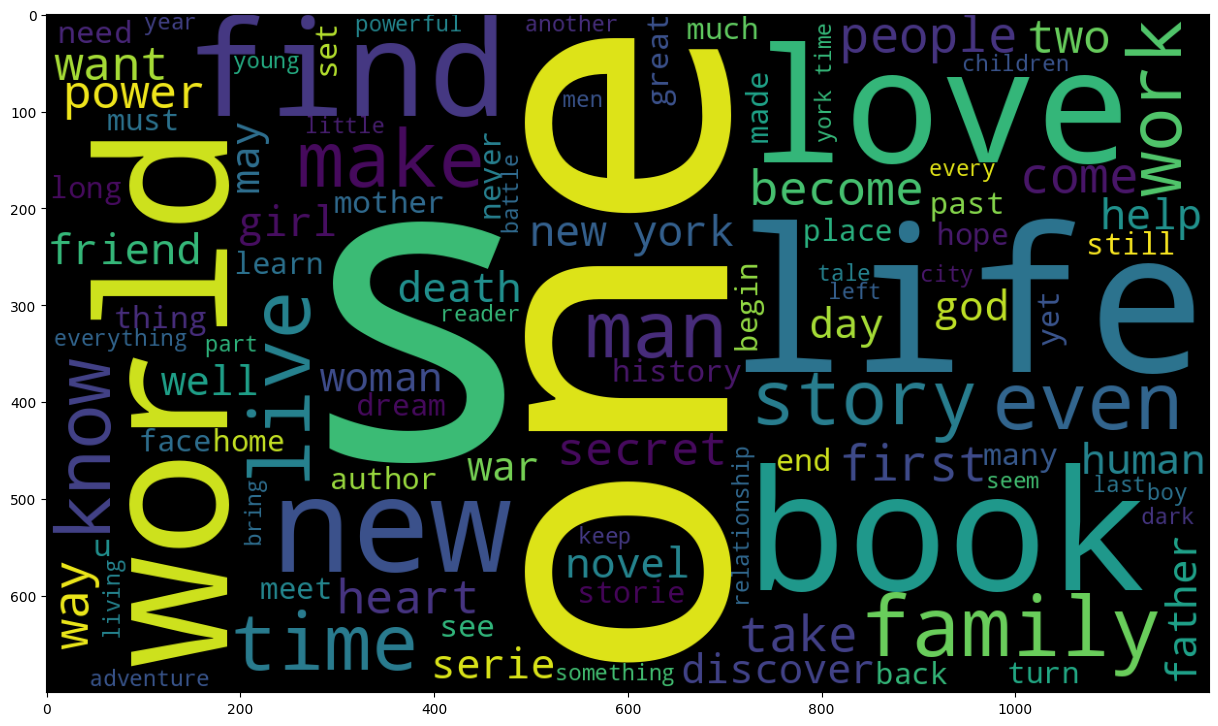

In [28]:
from wordcloud import WordCloud
wc_dff=' '.join([word for word in dff['description'].values])
wc=WordCloud(width=1200,height=700,max_words=100)
wc_of_dff=wc.generate(wc_dff)
plt.figure(figsize=(15,10))
plt.imshow(wc_of_dff)
plt.show()

## Stemming Process :

In [29]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
dff['description']=dff['description'].apply(lambda text:' '.join(ps.stem(word)for word in text.split()))
dff

,title,language,rating,description
0,The Hunger Games,English,4.33,win mean fame fortunelos mean certain deathth ...
1,Harry Potter and the Order of the Phoenix,English,4.5,door end silent corridor it s haunt harri pott...
2,To Kill a Mockingbird,English,4.28,unforgett novel childhood sleepi southern town...
3,Pride and Prejudice,English,4.26,altern cover edit isbn 9780679783268sinc immed...
4,The Book Thief,English,4.37,librarian' note altern cover edit found hereit...
...,...,...,...,...
22843,Elemental,English,4.07,seventeenyearold kara nightingal suddenli stru...
22844,Unbelievable,English,4.16,lilah lopez dreser' town take care unfinish fa...
22845,Fractured,English,4.0,fate trilog continu fractur it s call fractur ...
22846,Anasazi,English,4.19,'anasazi' sequel 'the thirteenth chime' emma m...


## Text Vectorization :

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=1500)
mat=tf.fit_transform(dff['description'])
mat.shape

(22848, 1500)

In [31]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig=sigmoid_kernel(mat,mat)

In [32]:
ind=pd.Series(dff.index,index=dff['title'])

# Model :

In [33]:
df5='No related content found'
try:
  name=input('Enter the Book name : ')
  idx=ind[name]
  sig_score=list(enumerate(sig[idx]))
  sig_score=sorted(sig_score,key=lambda x:x[1],reverse=True)
  mo=[m[0] for m in sig_score]
  res=dff[['title','rating']].iloc[mo]
except:
  print('book not found')
else:
  df3=pd.DataFrame(res.values,columns=res.columns)
  print('similar to your search')
  df4=df3.head(11)
  df4.index=range(0,11)
  if type(df4)==str:
    x='Check the book name and input again'
  else:
    df5=df4.iloc[1:,::]
df5


Enter the Book name : Harry Potter and the Order of the Phoenix
similar to your search


,title,rating
1,Harry Potter and the Prisoner of Azkaban,4.57
2,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.78
3,Harry Potter and the Methods of Rationality,4.39
4,Ghost Story,4.25
5,The Harry Potter Collection 1-4,4.68
6,Fantastic Beasts - The Crimes of Grindelwald: ...,4.09
7,This Magic Moment,4.05
8,Turn,4.47
9,Harry Potter and the Goblet of Fire,4.56
10,Harry Potter and the Chamber of Secrets,4.43


## Visualisation :

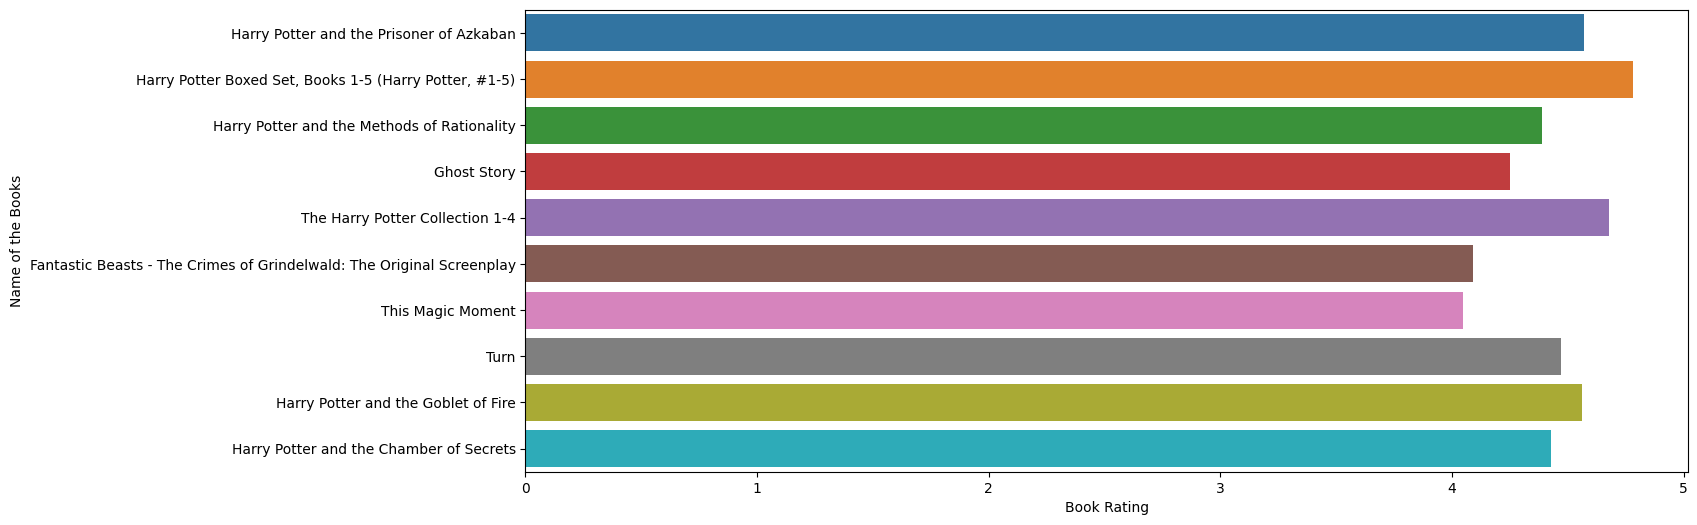

In [34]:
try:
  plt.figure(figsize=(15,6))
  sns.barplot(data=df5,x='rating',y='title')
  plt.xlabel('Book Rating')
  plt.ylabel('Name of the Books')
  plt.show()
except:
  print('Somthing went wrong')